In [1]:

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr') # working directory should be pm4py-dcr (the one behind notebooks)
print(os.getcwd())
import pandas as pd
import numpy as np
from itertools import product
import matplotlib as mpl     
import matplotlib.pyplot as plt
from pm4py.util.external_functions import *

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}
mpl.rc('font', **font)

/home/vco/Projects/pm4py-dcr/notebooks_projects
/home/vco/Projects/pm4py-dcr


In [2]:
results = pd.read_csv('models/results.csv')
results['NonSeparability'] = 1 - results['Co-Separability']
results.drop('Co-Separability',axis=1, inplace=True)
configs_renaming = {'config 0': 'Flat', 'config 1': 'Choice', 'config 2': 'Group', 'config 3':'Choice+Group'}
simplicty_results = results[['Log name','Algorithm','#Relations','#Activities','Size','Density','Separability','NonSeparability','Constraint Variability','Runtime']]
simplicty_results = simplicty_results.replace({'Algorithm':configs_renaming})
simplicty_results['Log name'] = simplicty_results['Log name'].apply(lambda x: x.split('_')[0]+x.split('_')[1] if x.split('_')[0] =='pdc' else x)
simplicty_results['Log name'] = simplicty_results['Log name'].apply(lambda x: x.split('_')[0] if x.split('_')[0] in ['pdc2021','pdc2022','pdc2023'] else x)
logs = sorted(simplicty_results['Log name'].unique())
res_all = simplicty_results.groupby(['Log name','Algorithm']).mean().reindex(product(logs,['Flat','Choice','Group','Choice+Group']))
bpic17_res = results[results['Log name'].str.startswith('BPIC17-Offer')][['Algorithm','Size','Density','Separability','Constraint Variability']]
res_overview = simplicty_results.groupby('Algorithm').mean().reindex(['Flat','Choice','Group','Choice+Group'])
res_all.to_csv('models/all_simplicity.csv')
res_all.drop('Separability',axis=1).to_csv('models/all_simplicity.csv')
res_all.reset_index()['Log name'].nunique()

/tmp/ipykernel_11131/2758013202.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_overview = simplicty_results.groupby('Algorithm').mean().reindex(['Flat','Choice','Group','Choice+Group'])


21

In [5]:
res_all.reset_index()[~res_all.reset_index()['Log name'].str.startswith('pdc')]['Log name'].nunique()

16

/tmp/ipykernel_11131/98023718.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  metrics.boxplot(by='Algorithm',column=metric_names,sharey=False,sym='x',ax=ax,positions=[1,3,0,2])


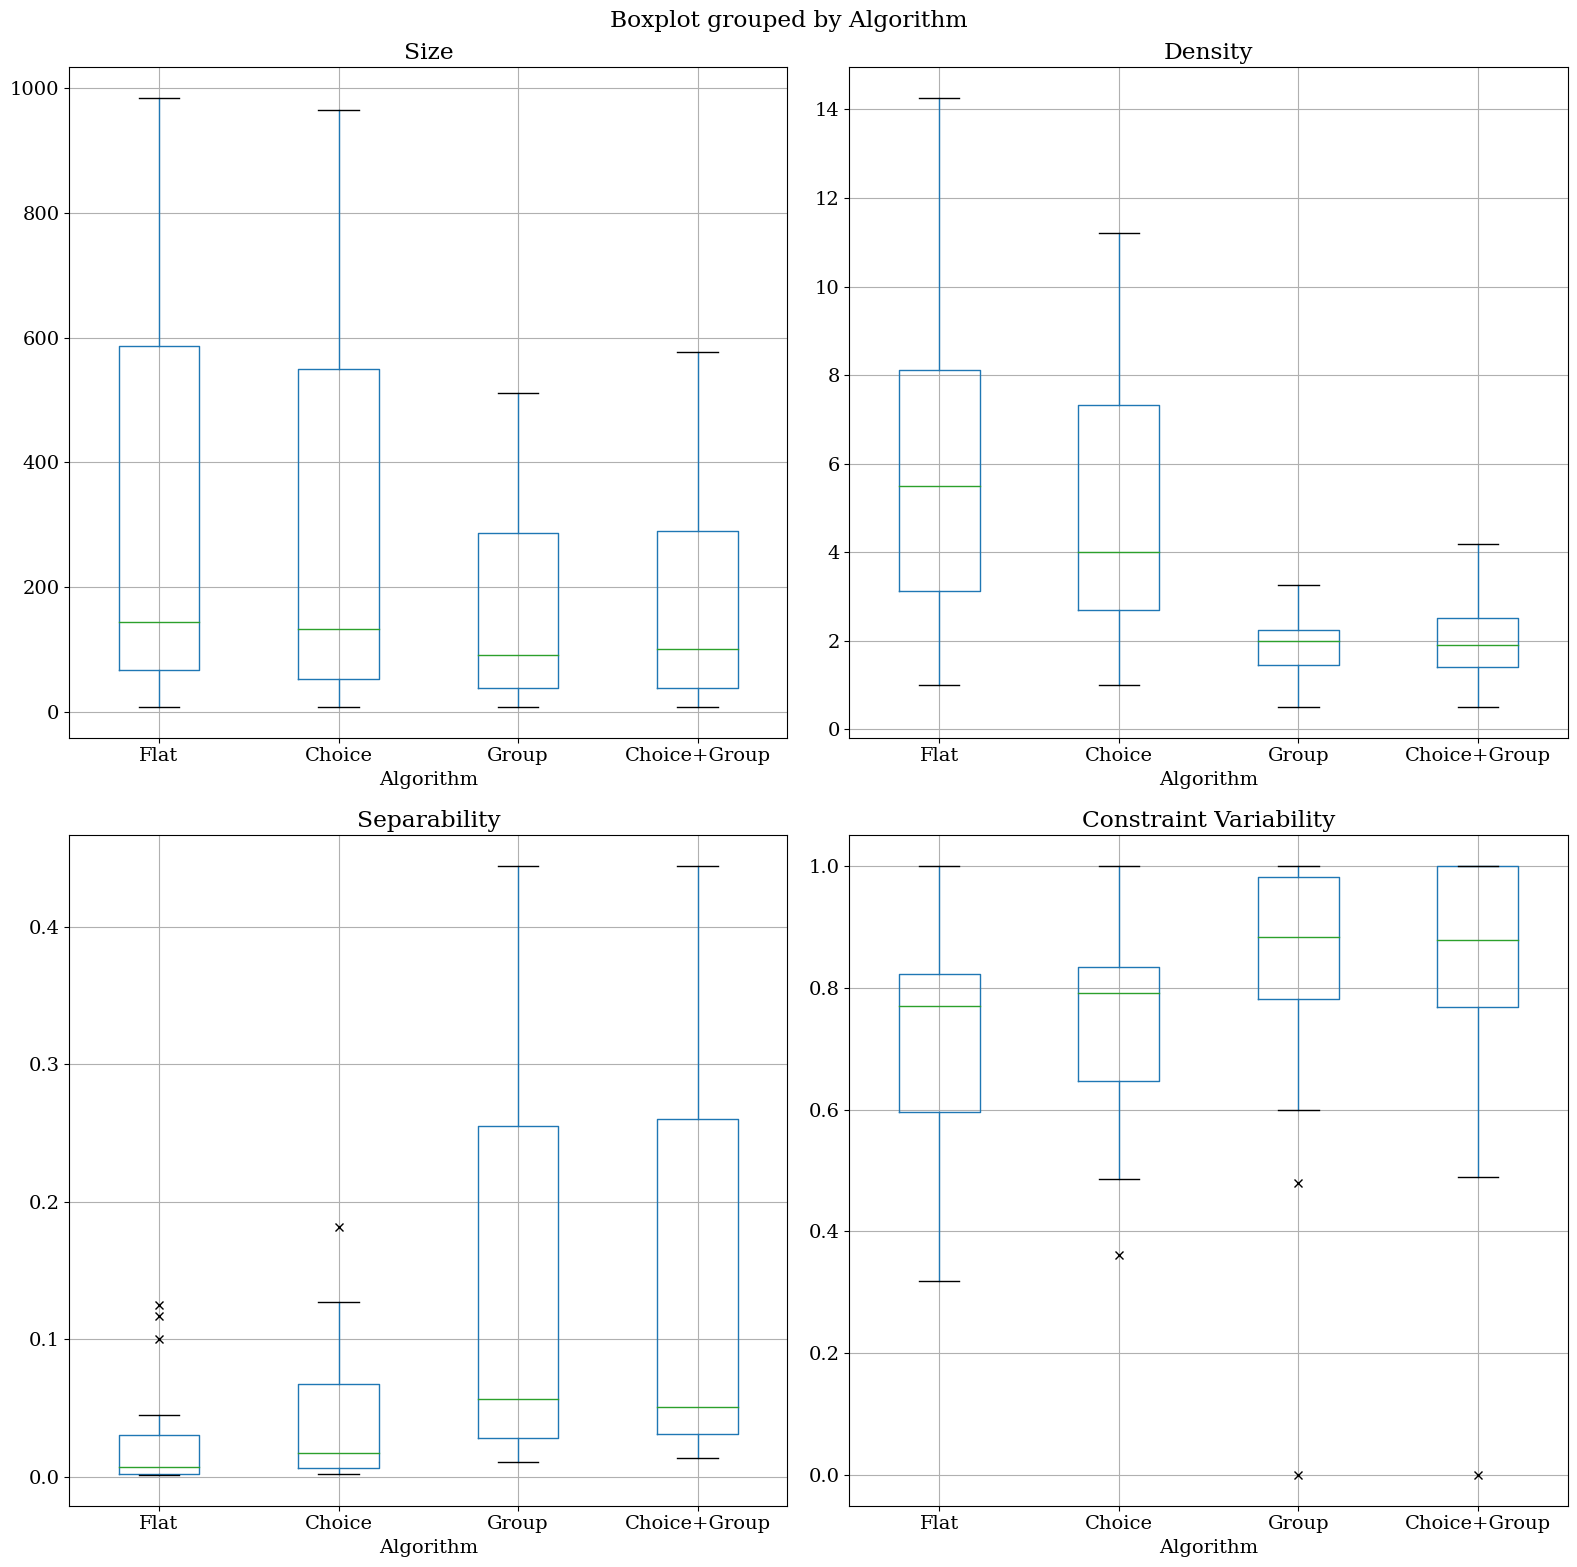

In [6]:
metric_names = ['Size','Density','Separability','Constraint Variability']
metrics = res_all.reset_index()[['Algorithm','Size','Density','Separability','Constraint Variability']]
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 16))
metrics.boxplot(by='Algorithm',column=metric_names,sharey=False,sym='x',ax=ax,positions=[1,3,0,2])
fig.tight_layout()
plt.savefig('models/simplicity.png')

In [7]:
res_overview.to_csv('models/aggregated_simplicity.csv')
res_overview

,#Relations,#Activities,Size,Density,Separability,NonSeparability,Constraint Variability,Runtime
Algorithm,,,,,,,,
Flat,237.412932,28.519846,265.932778,6.433272,0.038711,0.961289,0.612092,0.167344
Choice,213.667734,30.428297,244.096031,5.347552,0.055390,0.944610,0.646995,0.165387
Group,65.447503,43.681818,109.129321,1.630409,0.160016,0.839984,0.802416,0.258740
Choice+Group,72.818822,51.108195,123.927017,1.494181,0.169296,0.830704,0.819110,0.176288


In [8]:
res_all

#Relations  #Activities        Size   Density  \
Log name  Algorithm                                                     
BPIC12    Flat          132.000000    24.000000  156.000000  5.500000   
          Choice        108.000000    26.000000  134.000000  4.153846   
          Group          59.000000    32.000000   91.000000  1.964286   
          Choice+Group   65.000000    36.000000  101.000000  1.906250   
BPIC13_cp Flat            4.000000     4.000000    8.000000  1.000000   
...                            ...          ...         ...       ...   
pdc2022   Choice+Group   19.385417    19.579167   38.964583  1.280199   
pdc2023   Flat           89.333333    25.875000  115.208333  3.502427   
          Choice         68.614583    27.755208   96.369792  2.693270   
          Group          41.937500    36.291667   78.229167  1.459573   
          Choice+Group   39.718750    38.098958   77.817708  1.311888   

                        Separability  NonSeparability  Constraint Variability  \
Log name  Algorithm                                                             
BPIC12    Flat              0.006410         0.993590                0.594939   
          Choice            0.007463         0.992537                0.657725   
          Group             0.054945         0.945055                0.781862   
          Choice+Group      0.039604         0.960396                0.768855   
BPIC13_cp Flat              0.125000         0.875000                0.811278   
...                              ...              ...                     ...   
pdc2022   Choice+Group      0.238349         0.761651                0.635214   
pdc2023   Flat              0.044847         0.955153                0.781665   
          Choice            0.072175         0.927825                0.791285   
          Group             0.175955         0.824045                0.883821   
          Choice+Group      0.192956         0.807044                0.893723   

                         Runtime  
Log name  Algorithm               
BPIC12    Flat          1.829219  
          Choice        1.812259  
          Group         2.715008  
          Choice+Group  1.631640  
BPIC13_cp Flat          0.042243  
...                          ...  
pdc2022   Choice+Group  0.040292  
pdc2023   Flat          0.218588  
          Choice        0.210362  
          Group         0.320555  
          Choice+Group  0.218858  

[84 rows x 8 columns]

# On running example

In [9]:
flat_dict = bpic17_res[bpic17_res['Algorithm']=='config 0'][metric_names].to_dict('records')[0]

In [30]:
flat_dict['Density'] = 3.13
flat_dict['Constraint Variability'] = 0.70

/tmp/ipykernel_24053/2084344976.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


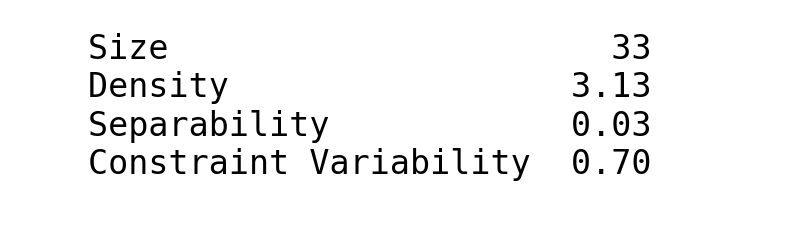

In [31]:
fig, ax = plt.subplots(figsize=(10, 3))
text = nice_string_output(flat_dict, extra_spacing=2, decimals=2)
add_text_to_ax(0.1, 0.9, text, ax, fontsize=24)
fig.show()
plt.grid(False)
plt.axis('off')
plt.savefig('models/bpic17_flat_metrics.png')

In [32]:
nest_dict = bpic17_res[bpic17_res['Algorithm']=='config 3'][metric_names].to_dict('records')[0]

In [33]:
nest_dict['Constraint Variability'] = 0.85

/tmp/ipykernel_11131/3222618745.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


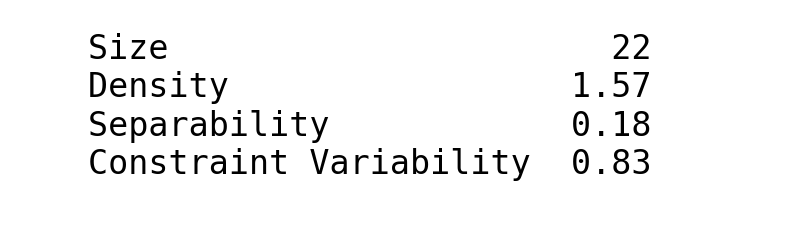

In [13]:
fig, ax = plt.subplots(figsize=(10, 3))
text = nice_string_output(nest_dict, extra_spacing=2, decimals=2)
add_text_to_ax(0.1, 0.9, text, ax, fontsize=24)
fig.show()
plt.grid(False)
plt.axis('off')
plt.savefig('models/bpic17_nested_metrics.png')

In [10]:
nest_dict = bpic17_res[bpic17_res['Algorithm']=='config 1'][metric_names].to_dict('records')[0]

/tmp/ipykernel_11131/210126231.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


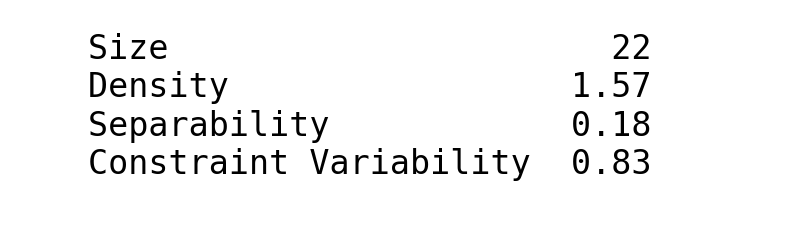

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
text = nice_string_output(nest_dict, extra_spacing=2, decimals=2)
add_text_to_ax(0.1, 0.9, text, ax, fontsize=24)
fig.show()
plt.grid(False)
plt.axis('off')
plt.savefig('models/bpic17_choice_metrics.png')

In [25]:
res_all[['#Activities','#Relations','Size','Density','Separability','Constraint Variability']]

#Activities  #Relations        Size   Density  \
Log name  Algorithm                                                     
BPIC12    Flat            24.000000  132.000000  156.000000  5.500000   
          Choice          26.000000  108.000000  134.000000  4.153846   
          Group           32.000000   59.000000   91.000000  1.964286   
          Choice+Group    36.000000   65.000000  101.000000  1.906250   
BPIC13_cp Flat             4.000000    4.000000    8.000000  1.000000   
...                             ...         ...         ...       ...   
pdc2022   Choice+Group    19.579167   19.385417   38.964583  1.280199   
pdc2023   Flat            25.875000   89.333333  115.208333  3.502427   
          Choice          27.755208   68.614583   96.369792  2.693270   
          Group           36.291667   41.937500   78.229167  1.459573   
          Choice+Group    38.098958   39.718750   77.817708  1.311888   

                        Separability  Constraint Variability  
Log name  Algorithm                                           
BPIC12    Flat              0.006410                0.594939  
          Choice            0.007463                0.657725  
          Group             0.054945                0.781862  
          Choice+Group      0.039604                0.768855  
BPIC13_cp Flat              0.125000                0.811278  
...                              ...                     ...  
pdc2022   Choice+Group      0.238349                0.635214  
pdc2023   Flat              0.044847                0.781665  
          Choice            0.072175                0.791285  
          Group             0.175955                0.883821  
          Choice+Group      0.192956                0.893723  

[84 rows x 6 columns]

# Ratios all metrics

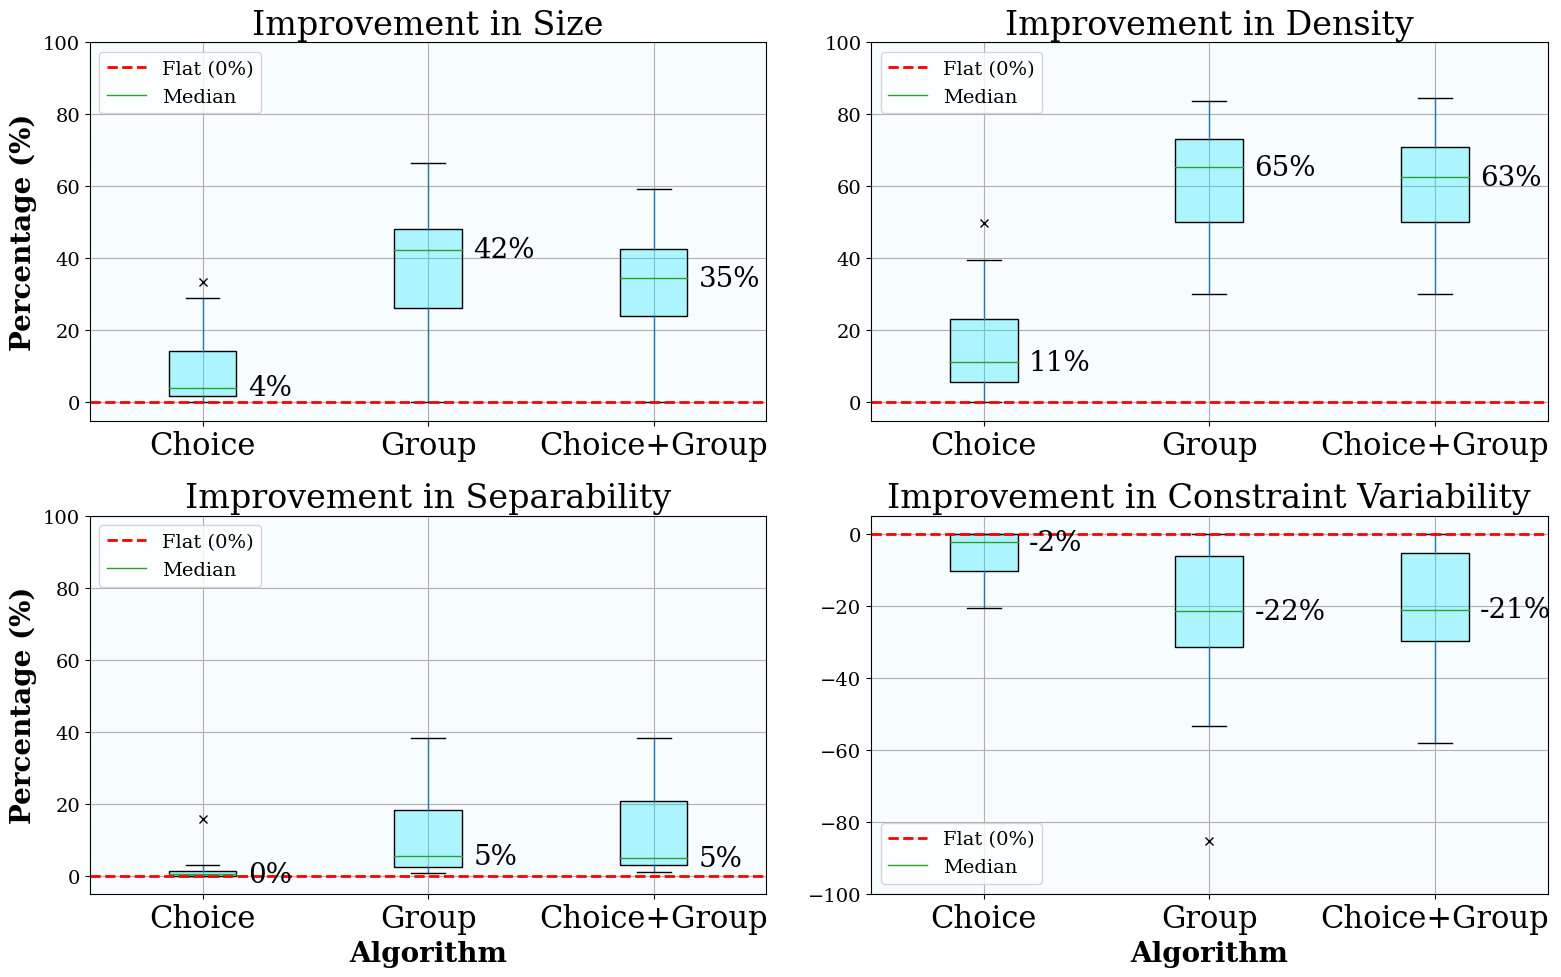

In [23]:
columns_to_plot = ['Size','Density','NonSeparability','Constraint Variability']
def ratio(flat,nested):
    return (flat-nested)/(flat/100)

ratios = res_all[columns_to_plot].reset_index()
cols = [(a,m) for a,m in product(columns_to_plot,['Choice','Nest','Choice+Nest'])]
multi_index_cols = pd.MultiIndex.from_tuples(cols)
res = pd.DataFrame(columns=['Log name'].extend(multi_index_cols))
res['Log name'] = ratios[ratios['Algorithm']=='Flat'].reset_index(drop=True)['Log name']
for metric in columns_to_plot:
    for alg in ['Choice','Group','Choice+Group']:
        res[(alg, metric)] = ratio(ratios[ratios['Algorithm']=='Flat'][metric].reset_index(drop=True), ratios[ratios['Algorithm']==alg][metric].reset_index(drop=True))
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 10))
i = 0
j = 0
for metric in columns_to_plot:
    bp_df = res[[('Choice', metric),('Group', metric),('Choice+Group', metric)]].copy(deep=True)
    bp_df.columns = ['Choice','Group','Choice+Group']
    boxplt = bp_df.boxplot(ax = ax[i,j],patch_artist=True, sym='x', return_type='dict',boxprops=dict(facecolor=(0.0, 0.9, 1.0, 0.3)))
    for k, line in enumerate(boxplt['medians']):
        x_pos,y_pos = line.get_xydata()[1]
        ax[i,j].text(x_pos+0.05, y_pos, f'{y_pos:.0f}%',fontsize=20, ha='left', va='center', color='black')
    # Set font size for box labels
    for label in ax[i,j].get_xticklabels():
        label.set_fontsize(22)
    line2d = ax[i,j].axhline(y=0, color='red', linestyle='--', label='Flat',linewidth=2)
    if metric == 'NonSeparability':
        metric = 'Separability'
    ax[i,j].set_title(f'Improvement in {metric}', fontsize=24)
    if j == 0:
        ax[i,j].set_ylabel('Percentage (%)',fontsize=20,fontweight='bold')
    if i == 1:
        ax[i,j].set_xlabel('Algorithm',fontsize=20,fontweight='bold')
    ax[i,j].set_facecolor((0.7, 0.9, 1.0, 0.1))
    if i == 1 and j == 1:
        ax[i,j].set_ylim(-100,5)
        ax[i,j].legend([line2d,boxplt['medians'][0]],['Flat (0%)','Median'],loc='lower left')
    else:
        ax[i,j].set_ylim(-5,100)
        ax[i,j].legend([line2d,boxplt['medians'][0]],['Flat (0%)','Median'],loc='upper left')
    if i == 0 and j == 0:
        j = 1
    elif i == 0 and j == 1:
        i = 1
        j = 0
    elif i == 1 and j == 0:
        j = 1
    
fig.tight_layout()
plt.savefig('models/simplicity_ratios.png')

In [19]:
temp = res.columns.to_list()
temp.remove('Log name')

In [20]:
res[res[('Group','Size')]<res[('Choice+Group','Size')]].sort_values(by=('Choice+Group','Size'),ascending=False)

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
15,SEPSIS,28.971963,49.532710,52.336449,39.583333,65.555556,75.555556,0.776942,13.192240,16.078431,-10.280127,-6.188780,-7.635681
19,pdc2022,20.493767,42.357060,42.568937,31.432480,65.303143,69.555882,2.782415,18.207649,20.615857,-20.799668,-49.076406,-58.071139
20,pdc2023,16.351718,32.097649,32.454792,23.102766,58.326830,62.543472,2.861118,13.726369,15.506321,-1.230701,-13.068985,-14.335794
11,BPIC17_f,2.439024,9.756098,10.975610,6.250000,43.750000,44.921875,1.296296,1.501502,1.538982,-0.053165,-1.600788,-0.224418


In [21]:
res[res[('Group','Density')]<res[('Choice+Group','Density')]].sort_values(by=('Choice+Group','Density'),ascending=False)

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
18,pdc2021,5.826633,66.444270,59.246815,11.213755,83.610743,84.667407,0.102585,5.465134,4.607029,-3.303614,-53.499076,-55.291290
12,BPIC19,14.352574,55.226209,54.602184,21.469115,77.185857,79.349144,0.026184,0.890679,1.220468,-12.964250,-50.306040,-53.412427
13,Dreyers,0.000000,46.511628,41.196013,0.000000,70.721393,76.032783,0.000000,4.028986,4.201507,0.000000,-24.882275,-24.219891
15,SEPSIS,28.971963,49.532710,52.336449,39.583333,65.555556,75.555556,0.776942,13.192240,16.078431,-10.280127,-6.188780,-7.635681
19,pdc2022,20.493767,42.357060,42.568937,31.432480,65.303143,69.555882,2.782415,18.207649,20.615857,-20.799668,-49.076406,-58.071139
0,BPIC12,14.102564,41.666667,35.256410,24.475524,64.285714,65.340909,0.105922,4.884793,3.340786,-10.553266,-31.418872,-29.232500
20,pdc2023,16.351718,32.097649,32.454792,23.102766,58.326830,62.543472,2.861118,13.726369,15.506321,-1.230701,-13.068985,-14.335794
17,pdc2020,2.603529,25.091889,24.215878,5.569752,50.434765,52.485846,1.132796,15.657289,16.225400,0.014040,-3.772483,-4.125993
11,BPIC17_f,2.439024,9.756098,10.975610,6.250000,43.750000,44.921875,1.296296,1.501502,1.538982,-0.053165,-1.600788,-0.224418


In [32]:
res[res[('Group','NonSeparability')]<res[('Choice+Group','NonSeparability')]].sort_values(by=('Choice+Group','NonSeparability'),ascending=False)

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
10,BPIC17-Offer,33.333333,21.212121,33.333333,49.714286,49.714286,46.666667,15.625000,20.673077,25.000000,-17.646667,-19.996482,-21.097704
19,pdc2022,20.461803,40.822280,42.867232,31.372515,68.944998,69.494110,2.758458,19.707105,20.896445,-20.853601,-57.212974,-58.607756
15,SEPSIS,28.971963,51.401869,54.205607,39.583333,68.888889,77.777778,0.776942,15.732601,18.892128,-10.280127,-3.694855,-10.280127
17,pdc2020,2.567402,23.253676,24.295343,4.886696,51.334777,51.098679,1.149780,15.519367,15.985286,0.008605,-3.254147,-3.385562
20,pdc2023,16.230035,28.347134,32.342428,22.925343,60.250180,62.266652,2.859458,13.474602,15.608653,-1.190141,-13.825482,-14.049272
16,pdc2019,30.941499,58.089580,57.975320,38.862184,79.958001,77.876622,1.455061,7.630973,8.205000,-16.025879,-56.131936,-48.831616
5,BPIC15_2f,1.946721,47.643443,42.930328,6.982498,80.773533,72.969629,0.525038,2.248181,3.312066,-1.243015,-52.533947,-15.449635
4,BPIC15_1f,5.504587,34.128440,24.587156,15.362731,68.460403,54.692049,1.566962,2.327749,3.228764,-4.695932,-21.522108,-21.522108
8,BPIC15_5f,3.105590,41.770186,28.105590,10.454341,73.010157,56.987418,0.647007,2.515293,3.089258,-2.139447,-19.618301,-26.393680
11,BPIC17_f,2.439024,8.536585,10.975610,6.250000,44.921875,44.921875,1.296296,1.465021,1.538982,-0.053165,-1.234257,-1.234257


In [26]:
res

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
0,BPIC12,14.102564,41.666667,35.256410,24.475524,64.285714,65.340909,0.105922,4.884793,3.340786,-10.553266,-31.418872,-29.232500
1,BPIC13_cp,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,28.571429,28.571429,0.000000,100.000000,100.000000
2,BPIC13_i,0.000000,10.000000,10.000000,0.000000,33.333333,33.333333,0.000000,38.271605,38.271605,0.000000,0.000000,0.000000
3,BPIC14_f,0.000000,47.222222,47.222222,0.000000,46.666667,46.666667,0.000000,35.037594,35.037594,0.000000,-0.099071,-0.099071
4,BPIC15_1f,4.954128,35.963303,23.669725,13.395818,67.024492,52.906178,1.556822,2.399713,3.428574,-3.926791,-21.522108,-21.522108
5,BPIC15_2f,1.930894,47.967480,41.361789,6.951872,73.160173,71.009306,0.520665,1.462360,3.021028,-1.211119,-12.281042,-56.295434
6,BPIC15_3f,4.073587,60.709593,34.559790,14.432382,79.851287,62.926171,0.417087,4.891744,2.884432,-2.787808,-85.300345,-5.280977
7,BPIC15_4f,2.896082,48.040886,39.522998,8.806626,73.595532,68.573253,0.356565,4.427349,4.908427,-0.649482,-21.683546,-21.683546
8,BPIC15_5f,2.936631,45.285935,28.284389,8.239184,71.741572,58.772990,0.961576,2.391510,2.651262,-2.608071,-23.428623,-19.094752
9,BPIC17,6.896552,26.206897,24.137931,12.605042,61.026573,60.784314,0.051440,2.128764,1.136364,-2.368918,-12.011638,-10.940660


In [42]:
res[res[('Group','Size')]>=res[('Choice+Group','Size')]].sort_values(by=('Choice+Group','Size'),ascending=False)

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
18,pdc2021,5.519296,62.250932,60.224825,10.929092,87.702488,85.553351,0.105856,6.174791,4.823857,-3.379572,-58.137565,-54.533483
12,BPIC19,15.887850,59.813084,59.345794,23.000000,88.197674,84.316456,0.029468,2.949606,0.995212,-14.483295,-186.922942,-59.240993
16,pdc2019,30.941499,58.089580,57.975320,38.862184,79.958001,77.876622,1.455061,7.630973,8.205000,-16.025879,-56.131936,-48.831616
3,BPIC14_f,0.000000,47.222222,47.222222,0.000000,46.666667,46.666667,0.000000,35.037594,35.037594,0.000000,-0.099071,-0.099071
13,Dreyers,0.000000,43.434343,43.434343,0.000000,81.048387,81.048387,0.000000,4.440154,4.440154,0.000000,-28.812953,-28.812953
5,BPIC15_2f,1.946721,47.643443,42.930328,6.982498,80.773533,72.969629,0.525038,2.248181,3.312066,-1.243015,-52.533947,-15.449635
6,BPIC15_3f,4.089710,59.630607,38.786280,13.578658,82.381865,66.446360,0.694299,4.776336,3.752335,-2.294148,-86.929265,-8.054730
7,BPIC15_4f,2.207131,46.010187,35.993209,6.873077,76.510476,66.603053,0.525557,4.239935,3.549775,-1.431833,-21.412315,-21.412315
0,BPIC12,14.375000,40.625000,35.000000,24.660633,71.122995,64.705882,0.105587,4.667329,3.241413,-9.314139,-30.409087,-26.515862
8,BPIC15_5f,3.105590,41.770186,28.105590,10.454341,73.010157,56.987418,0.647007,2.515293,3.089258,-2.139447,-19.618301,-26.393680


In [43]:
res[res[('Group','Density')]>=res[('Choice+Group','Density')]].sort_values(by=('Choice+Group','Density'),ascending=False)

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
18,pdc2021,5.519296,62.250932,60.224825,10.929092,87.702488,85.553351,0.105856,6.174791,4.823857,-3.379572,-58.137565,-54.533483
12,BPIC19,15.887850,59.813084,59.345794,23.000000,88.197674,84.316456,0.029468,2.949606,0.995212,-14.483295,-186.922942,-59.240993
13,Dreyers,0.000000,43.434343,43.434343,0.000000,81.048387,81.048387,0.000000,4.440154,4.440154,0.000000,-28.812953,-28.812953
16,pdc2019,30.941499,58.089580,57.975320,38.862184,79.958001,77.876622,1.455061,7.630973,8.205000,-16.025879,-56.131936,-48.831616
5,BPIC15_2f,1.946721,47.643443,42.930328,6.982498,80.773533,72.969629,0.525038,2.248181,3.312066,-1.243015,-52.533947,-15.449635
7,BPIC15_4f,2.207131,46.010187,35.993209,6.873077,76.510476,66.603053,0.525557,4.239935,3.549775,-1.431833,-21.412315,-21.412315
6,BPIC15_3f,4.089710,59.630607,38.786280,13.578658,82.381865,66.446360,0.694299,4.776336,3.752335,-2.294148,-86.929265,-8.054730
0,BPIC12,14.375000,40.625000,35.000000,24.660633,71.122995,64.705882,0.105587,4.667329,3.241413,-9.314139,-30.409087,-26.515862
9,BPIC17,7.092199,24.113475,24.113475,12.914654,60.893067,59.542334,0.054526,3.991989,1.168224,-2.853644,-13.986863,-12.633078
8,BPIC15_5f,3.105590,41.770186,28.105590,10.454341,73.010157,56.987418,0.647007,2.515293,3.089258,-2.139447,-19.618301,-26.393680


In [44]:
res[res[('Group','NonSeparability')]>=res[('Choice+Group','NonSeparability')]].sort_values(by=('Choice+Group','NonSeparability'),ascending=False)

,Log name,"(Choice, Size)","(Group, Size)","(Choice+Group, Size)","(Choice, Density)","(Group, Density)","(Choice+Group, Density)","(Choice, NonSeparability)","(Group, NonSeparability)","(Choice+Group, NonSeparability)","(Choice, Constraint Variability)","(Group, Constraint Variability)","(Choice+Group, Constraint Variability)"
2,BPIC13_i,0.000000,10.000000,10.000000,0.000000,33.333333,33.333333,0.000000,38.271605,38.271605,0.000000,0.000000,0.000000
3,BPIC14_f,0.000000,47.222222,47.222222,0.000000,46.666667,46.666667,0.000000,35.037594,35.037594,0.000000,-0.099071,-0.099071
1,BPIC13_cp,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,28.571429,28.571429,0.000000,100.000000,100.000000
14,RTFMP,0.000000,9.090909,9.090909,0.000000,30.000000,30.000000,0.000000,24.375000,24.375000,0.000000,-29.941747,-29.941747
18,pdc2021,5.519296,62.250932,60.224825,10.929092,87.702488,85.553351,0.105856,6.174791,4.823857,-3.379572,-58.137565,-54.533483
13,Dreyers,0.000000,43.434343,43.434343,0.000000,81.048387,81.048387,0.000000,4.440154,4.440154,0.000000,-28.812953,-28.812953
6,BPIC15_3f,4.089710,59.630607,38.786280,13.578658,82.381865,66.446360,0.694299,4.776336,3.752335,-2.294148,-86.929265,-8.054730
7,BPIC15_4f,2.207131,46.010187,35.993209,6.873077,76.510476,66.603053,0.525557,4.239935,3.549775,-1.431833,-21.412315,-21.412315
0,BPIC12,14.375000,40.625000,35.000000,24.660633,71.122995,64.705882,0.105587,4.667329,3.241413,-9.314139,-30.409087,-26.515862
9,BPIC17,7.092199,24.113475,24.113475,12.914654,60.893067,59.542334,0.054526,3.991989,1.168224,-2.853644,-13.986863,-12.633078


# Horizontal

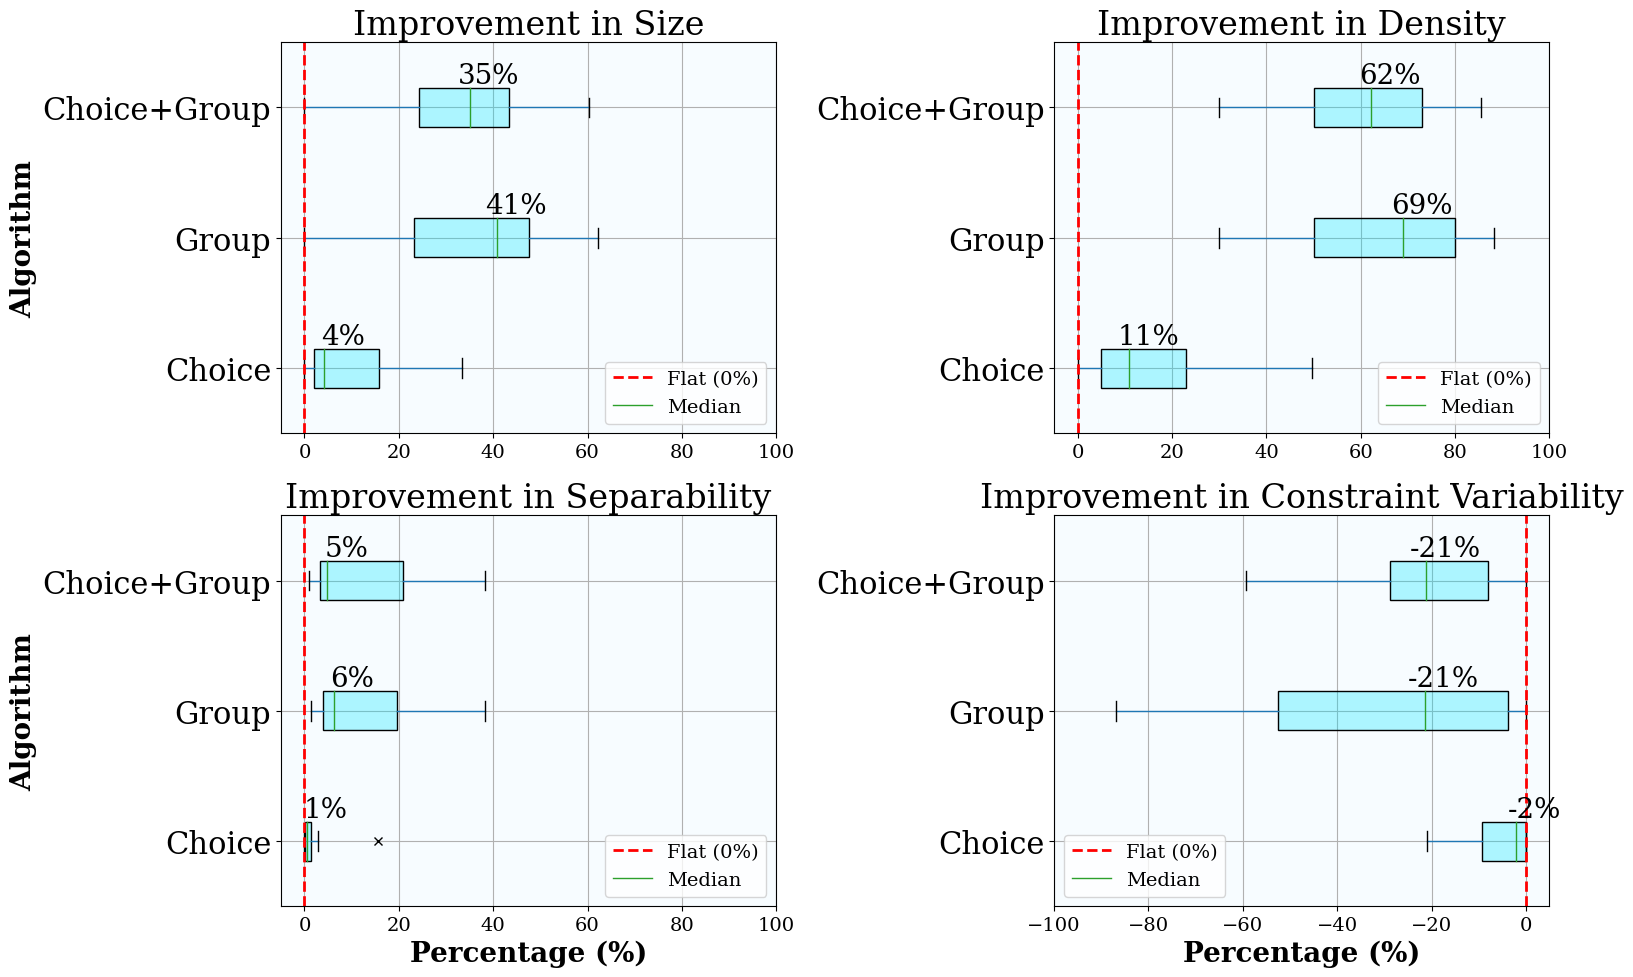

In [191]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 10))
i = 0
j = 0
for metric in ['Size','Density','NonSeparability','Constraint Variability']:
    bp_df = res[[('Choice', metric),('Group', metric),('Choice+Group', metric)]].copy(deep=True)
    bp_df.columns = ['Choice','Group','Choice+Group']
    boxplt = bp_df.boxplot(ax = ax[i,j],patch_artist=True, sym='x', return_type='dict',boxprops=dict(facecolor=(0.0, 0.9, 1.0, 0.3)),vert=False)
    for k, line in enumerate(boxplt['medians']):
        x_pos,y_pos = line.get_xydata()[1]
        ax[i,j].text(x_pos+4, y_pos+0.2, f'{x_pos:.0f}%',fontsize=20, ha='center', va='top', color='black')
    # Set font size for box labels
    for label in ax[i,j].get_yticklabels():
        label.set_fontsize(22)
    line2d = ax[i,j].axvline(x=0, color='red', linestyle='--', label='Flat',linewidth=2)
    if metric == 'NonSeparability':
        metric = 'Separability'
    ax[i,j].set_title(f'Improvement in {metric}', fontsize=24)
    if i == 1:
        ax[i,j].set_xlabel('Percentage (%)',fontsize=20,fontweight='bold')
    if j == 0:
        ax[i,j].set_ylabel('Algorithm',fontsize=20,fontweight='bold')
    ax[i,j].set_facecolor((0.7, 0.9, 1.0, 0.1))
    if i == 1 and j == 1:
        ax[i,j].set_xlim(-100,5)
        ax[i,j].legend([line2d,boxplt['medians'][0]],['Flat (0%)','Median'],loc='lower left')
    else:
        ax[i,j].set_xlim(-5,100)
        ax[i,j].legend([line2d,boxplt['medians'][0]],['Flat (0%)','Median'],loc='lower right')
    if i == 0 and j == 0:
        j = 1
    elif i == 0 and j == 1:
        i = 1
        j = 0
    elif i == 1 and j == 0:
        j = 1
    
fig.tight_layout()
plt.savefig('models/simplicity_ratios_flipped.png')

# Example

In [25]:
print(f'Size decrease: {(33-22)/(33/100):.2f}%')
print(f'Density decrease: {(3.12-1.66)/(3.12/100):.2f}%')
print(f'NonSeparability decrease: {(0.97-0.73)/(0.97/100):.2f}%')
print(f'Separability increase: {(0.27-0.03)/(0.27/100):.2f}%')
print(f'Constraint Variability increase: {(0.86-0.71)/(0.71/100):.2f}%')

Size decrease: 33.33%
Density decrease: 46.79%
NonSeparability decrease: 24.74%
Separability decrease: 88.89%
Constraint Variability increase: 21.13%


# Old

In [74]:
results['Runtime'] = results['Runtime']*1000
results['PPV'] = results['TP']/(results['TP']+results['FP'])
results['TPR'] = results['TP']/(results['TP']+results['FN'])
results['TNR'] = results['TN']/(results['TN']+results['FP'])
renamed_columns = {'#Activities':'#Activities (avg)','#Subprocesses':'#Subprocesses (avg)','#InSpActivities':'#InSpActivities (avg)','#Relations':'#Relations (avg)','Runtime': 'Runtime (ms)'}
results_to_save = results[['PDC Year','Algorithm','TPR','TNR','PPV','F1-PDC','F1','BAC','Training Fitness','#Relations','#Subprocesses','#InSpActivities','#Activities','Runtime']]

In [75]:
results_to_save.groupby('Algorithm').mean(numeric_only=True).round(3).rename(columns=renamed_columns).to_csv('models/icpm_2023_results_per_algorithm.csv')

In [76]:
results_to_save.groupby('Algorithm').mean(numeric_only=True).round(3).rename(columns=renamed_columns)

,TPR,TNR,PPV,F1-PDC,F1,BAC,Training Fitness,#Relations (avg),#Subprocesses (avg),#InSpActivities (avg),#Activities (avg),Runtime (ms)
Algorithm,,,,,,,,,,,,
DisCoveR,0.897,0.654,0.786,0.667,0.807,0.776,1.0,139.614,0.00,0.000,27.492,136.282
DisCoveR_Tics,0.889,0.646,0.777,0.656,0.796,0.768,1.0,124.607,1.98,4.802,29.472,224.453
DisCoveR_Tics_no_re,0.893,0.635,0.768,0.652,0.796,0.764,1.0,94.693,1.98,4.802,29.472,225.890


In [70]:
((139.6-124.6)*100)/139.6

10.744985673352437

In [72]:
((139.6-94.6)*100)/139.6

32.23495702005731

In [71]:
((29-27)*100)/27

7.407407407407407

In [54]:
results_to_save.groupby(['PDC Year','Algorithm']).mean(numeric_only=True).round(3).rename(columns=renamed_columns).to_csv('models/icpm_2023_last_results_per_year_and_algorithm.csv')

In [62]:
round1 = results_to_save.groupby(['PDC Year','Algorithm']).mean(numeric_only=True).round(3).rename(columns=renamed_columns)

In [63]:
round1[['#Activities (avg)','#Subprocesses (avg)','#InSpActivities (avg)','#Relations (avg)']] = round1[['#Activities (avg)','#Subprocesses (avg)','#InSpActivities (avg)','#Relations (avg)']].round(1)

In [64]:
round1['Runtime (ms)'] = round1['Runtime (ms)'].round(0).astype(int)

In [66]:
round1.to_csv('models/icpm_2023_new_results_per_year_and_algorithm.csv')

In [65]:
round1

TPR    TNR    PPV  F1-PDC     F1    BAC  \
PDC Year Algorithm                                                        
PDC19    DisCoveR             0.987  0.944  0.950   0.964  0.967  0.965   
         DisCoveR_Tics        0.996  0.930  0.939   0.961  0.966  0.963   
         DisCoveR_Tics_no_re  0.996  0.924  0.933   0.957  0.963  0.960   
PDC20    DisCoveR             1.000  0.409  0.673   0.521  0.797  0.705   
         DisCoveR_Tics        1.000  0.411  0.674   0.523  0.797  0.705   
         DisCoveR_Tics_no_re  1.000  0.408  0.672   0.521  0.796  0.704   
PDC21    DisCoveR             1.000  0.958  0.962   0.978  0.980  0.979   
         DisCoveR_Tics        1.000  0.958  0.962   0.977  0.980  0.979   
         DisCoveR_Tics_no_re  1.000  0.956  0.960   0.976  0.979  0.978   
PDC22    DisCoveR             0.580  0.811  0.819   0.616  0.638  0.695   
         DisCoveR_Tics        0.544  0.776  0.779   0.571  0.593  0.660   
         DisCoveR_Tics_no_re  0.563  0.739  0.751   0.560  0.596  0.651   

                              Training Fitness  #Relations (avg)  \
PDC Year Algorithm                                                 
PDC19    DisCoveR                          1.0             397.6   
         DisCoveR_Tics                     1.0             218.6   
         DisCoveR_Tics_no_re               1.0             119.0   
PDC20    DisCoveR                          1.0              60.8   
         DisCoveR_Tics                     1.0              59.0   
         DisCoveR_Tics_no_re               1.0              57.4   
PDC21    DisCoveR                          1.0             346.3   
         DisCoveR_Tics                     1.0             331.6   
         DisCoveR_Tics_no_re               1.0             231.3   
PDC22    DisCoveR                          1.0              63.6   
         DisCoveR_Tics                     1.0              39.0   
         DisCoveR_Tics_no_re               1.0              30.1   

                              #Subprocesses (avg)  #InSpActivities (avg)  \
PDC Year Algorithm                                                         
PDC19    DisCoveR                             0.0                    0.0   
         DisCoveR_Tics                        6.2                   19.8   
         DisCoveR_Tics_no_re                  6.2                   19.8   
PDC20    DisCoveR                             0.0                    0.0   
         DisCoveR_Tics                        0.6                    1.1   
         DisCoveR_Tics_no_re                  0.6                    1.1   
PDC21    DisCoveR                             0.0                    0.0   
         DisCoveR_Tics                        4.4                   10.2   
         DisCoveR_Tics_no_re                  4.4                   10.2   
PDC22    DisCoveR                             0.0                    0.0   
         DisCoveR_Tics                        1.9                    5.1   
         DisCoveR_Tics_no_re                  1.9                    5.1   

                              #Activities (avg)  Runtime (ms)  
PDC Year Algorithm                                             
PDC19    DisCoveR                          40.0            89  
         DisCoveR_Tics                     46.2           116  
         DisCoveR_Tics_no_re               46.2           122  
PDC20    DisCoveR                          24.1           185  
         DisCoveR_Tics                     24.6           301  
         DisCoveR_Tics_no_re               24.6           300  
PDC21    DisCoveR                          47.2           145  
         DisCoveR_Tics                     51.7           254  
         DisCoveR_Tics_no_re               51.7           262  
PDC22    DisCoveR                          13.2            35  
         DisCoveR_Tics                     15.2            52  
         DisCoveR_Tics_no_re               15.2            52

In [67]:
pd.read_csv('models/icpm_2023_results_per_year_and_algorithm.csv')

,PDC Year,Algorithm,TPR,TNR,PPV,F1-PDC,F1,BAC,Training Fitness,#Relations (avg),#Subprocesses (avg),#InSpActivities (avg),#Activities (avg),Runtime (ms)
0,PDC19,DisCoveR,0.987,0.944,0.950,0.964,0.967,0.965,1.0,397.6,0.0,0.0,40.0,63
1,PDC19,DisCoveR_Tics,0.996,0.930,0.939,0.961,0.966,0.963,1.0,218.6,6.2,19.8,46.2,755
2,PDC19,DisCoveR_Tics_no_re,0.996,0.924,0.933,0.957,0.963,0.960,1.0,119.0,6.2,19.8,46.2,647
3,PDC20,DisCoveR,1.000,0.409,0.673,0.521,0.797,0.705,1.0,60.8,0.0,0.0,24.1,186
4,PDC20,DisCoveR_Tics,1.000,0.412,0.674,0.524,0.798,0.706,1.0,59.0,0.6,1.1,24.6,1188
5,PDC20,DisCoveR_Tics_no_re,1.000,0.409,0.672,0.522,0.796,0.704,1.0,57.4,0.6,1.1,24.6,1185
6,PDC21,DisCoveR,1.000,0.958,0.962,0.978,0.980,0.979,1.0,346.3,0.0,0.0,47.2,162
7,PDC21,DisCoveR_Tics,1.000,0.958,0.962,0.978,0.980,0.979,1.0,331.6,4.4,10.2,51.7,1605
8,PDC21,DisCoveR_Tics_no_re,1.000,0.956,0.960,0.976,0.979,0.978,1.0,231.3,4.4,10.2,51.7,1493
9,PDC22,DisCoveR,0.580,0.811,0.819,0.616,0.638,0.695,1.0,63.6,0.0,0.0,13.2,34
